In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/Datos_Nasa_Bogota_011984_082024.xlsx", sheet_name="Datos")
df

,PRECTOTCORR,RH2M,T2M,FECHA
0,10.81,88.38,16.74,1984-01-01
1,5.86,87.38,16.23,1984-01-02
2,4.67,88.94,16.33,1984-01-03
3,3.28,86.56,16.80,1984-01-04
4,11.92,86.50,17.05,1984-01-05
...,...,...,...,...
14849,0.56,76.56,18.46,2024-08-27
14850,0.94,77.12,18.13,2024-08-28
14851,2.52,79.75,18.18,2024-08-29
14852,0.19,74.94,17.87,2024-08-30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14854 entries, 0 to 14853
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PRECTOTCORR  14854 non-null  float64       
 1   RH2M         14854 non-null  float64       
 2   T2M          14854 non-null  float64       
 3   FECHA        14854 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 464.3 KB


In [4]:
df.index=df["FECHA"]

In [5]:
df

,PRECTOTCORR,RH2M,T2M,FECHA
FECHA,,,,
1984-01-01,10.81,88.38,16.74,1984-01-01
1984-01-02,5.86,87.38,16.23,1984-01-02
1984-01-03,4.67,88.94,16.33,1984-01-03
1984-01-04,3.28,86.56,16.80,1984-01-04
1984-01-05,11.92,86.50,17.05,1984-01-05
...,...,...,...,...
2024-08-27,0.56,76.56,18.46,2024-08-27
2024-08-28,0.94,77.12,18.13,2024-08-28
2024-08-29,2.52,79.75,18.18,2024-08-29


In [6]:
#df.drop(columns=["FECHA"], inplace=True)


In [7]:
df

,PRECTOTCORR,RH2M,T2M,FECHA
FECHA,,,,
1984-01-01,10.81,88.38,16.74,1984-01-01
1984-01-02,5.86,87.38,16.23,1984-01-02
1984-01-03,4.67,88.94,16.33,1984-01-03
1984-01-04,3.28,86.56,16.80,1984-01-04
1984-01-05,11.92,86.50,17.05,1984-01-05
...,...,...,...,...
2024-08-27,0.56,76.56,18.46,2024-08-27
2024-08-28,0.94,77.12,18.13,2024-08-28
2024-08-29,2.52,79.75,18.18,2024-08-29


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_theme()

<Axes: xlabel='FECHA'>

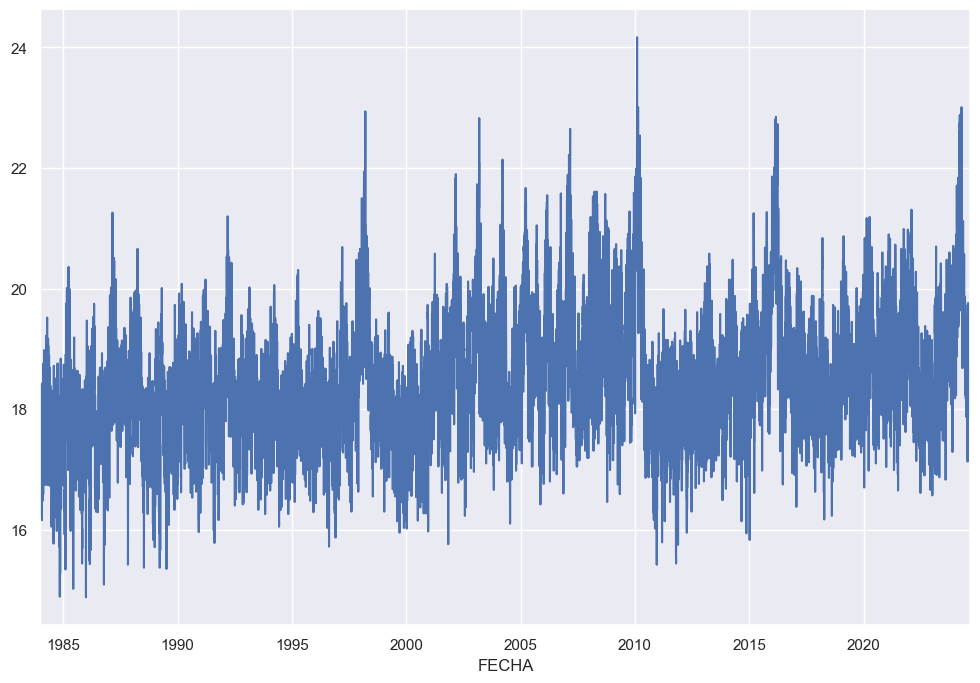

In [10]:
plt.figure(figsize=(12,8))
df["T2M"].plot()

<Axes: xlabel='FECHA'>

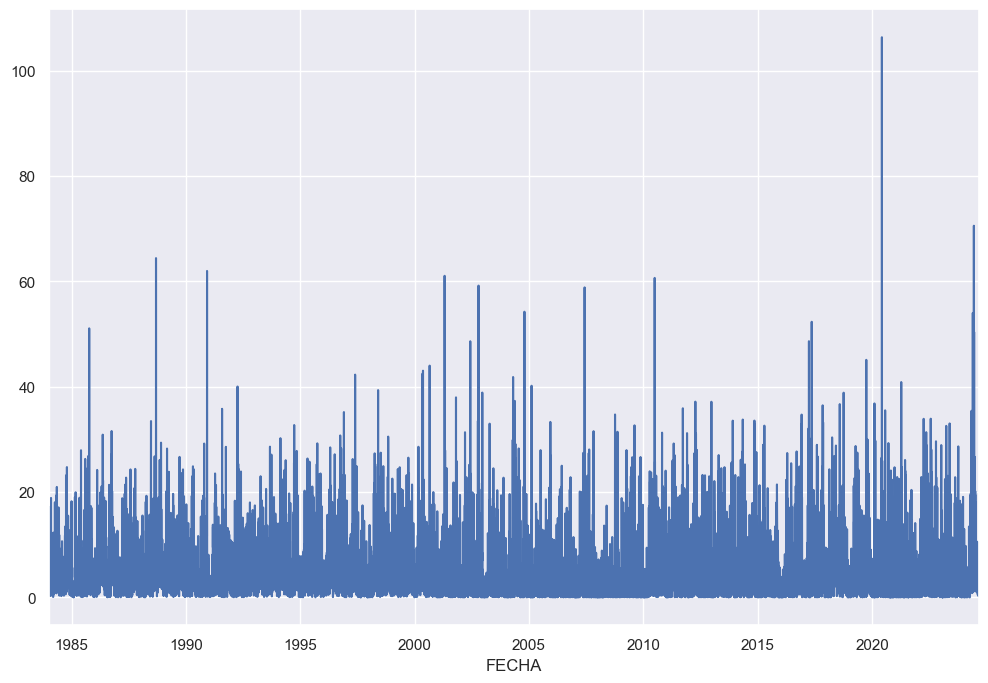

In [11]:
plt.figure(figsize=(12,8))
df["PRECTOTCORR"].plot()

<Axes: xlabel='FECHA'>

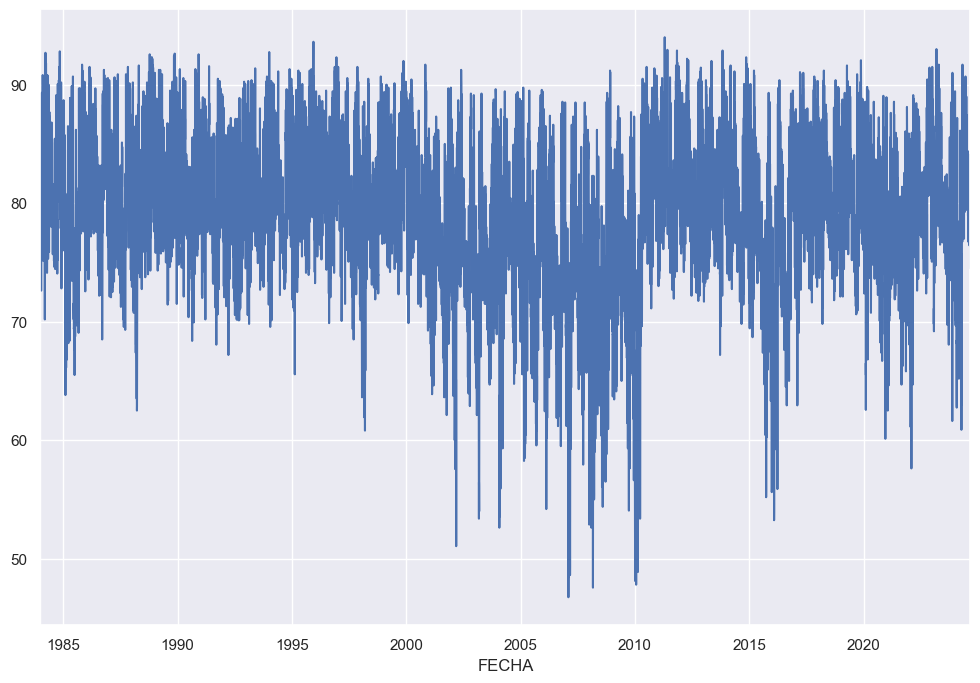

In [12]:
plt.figure(figsize=(12,8))
df["RH2M"].plot()

In [13]:
import yfinance as yf

# Prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

# VisualizaCION
import plotly.graph_objs as go

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df["T2M"], mode='lines', name='T2M'))

fig.update_layout(title='Temperatura a lo largo del tiempo',
                  xaxis_title='Fecha',
                  yaxis_title='Temperatura')

In [15]:
df.columns

Index(['PRECTOTCORR', 'RH2M', 'T2M', 'FECHA'], dtype='object')

In [16]:
# # Mantener solo la fecha y el precio de cierre
df = df.drop(['PRECTOTCORR', 'RH2M'], axis=1)

# Cambiar el nombre de la fecha a ds y cerrar el precio a y
df.rename(columns={'FECHA': 'ds', 'T2M': 'y'}, inplace=True)

df.head()

,y,ds
FECHA,,
1984-01-01,16.74,1984-01-01
1984-01-02,16.23,1984-01-02
1984-01-03,16.33,1984-01-03
1984-01-04,16.80,1984-01-04
1984-01-05,17.05,1984-01-05


In [17]:
# Train test split
df_train = df[df['ds']<='2023-12-31']
df_test = df[df['ds']>'2023-12-31']

# Print .
print('El conjunto de datos de entrenamiento tiene', len(df_train), 'que, van desde', df_train['ds'].min(), 'hasta', df_train['ds'].max())
print(' El conjunto de datos de prueba tiene', len(df_test), 'que, van desde', df_test['ds'].min(), 'hasta', df_test['ds'].max())

El conjunto de datos de entrenamiento tiene 14610 que, van desde 1984-01-01 00:00:00 hasta 2023-12-31 00:00:00
 El conjunto de datos de prueba tiene 244 que, van desde 2024-01-01 00:00:00 hasta 2024-08-31 00:00:00


In [18]:
# Crea el modelo con una confianza interna del 95%
m = Prophet(interval_width=0.95, n_changepoints=7, yearly_seasonality=True, weekly_seasonality=True,  daily_seasonality=True)

# Ajusta el modelo
m.fit(df_train)

22:01:54 - cmdstanpy - INFO - Chain [1] start processing
22:01:56 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Crear un marco de datos futuro para la predicción
future = m.make_future_dataframe(periods=244)

# Pronosticar los valores futuros del marco de datos
forecast = m.predict(future)

# Verifique los valores pronosticados y el pronóstico del límite
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14849,2024-08-27,18.678875,17.012213,20.493073
14850,2024-08-28,18.682423,17.029957,20.380595
14851,2024-08-29,18.686255,16.999364,20.559302
14852,2024-08-30,18.693302,16.936904,20.393448
14853,2024-08-31,18.711375,16.750683,20.369009


c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



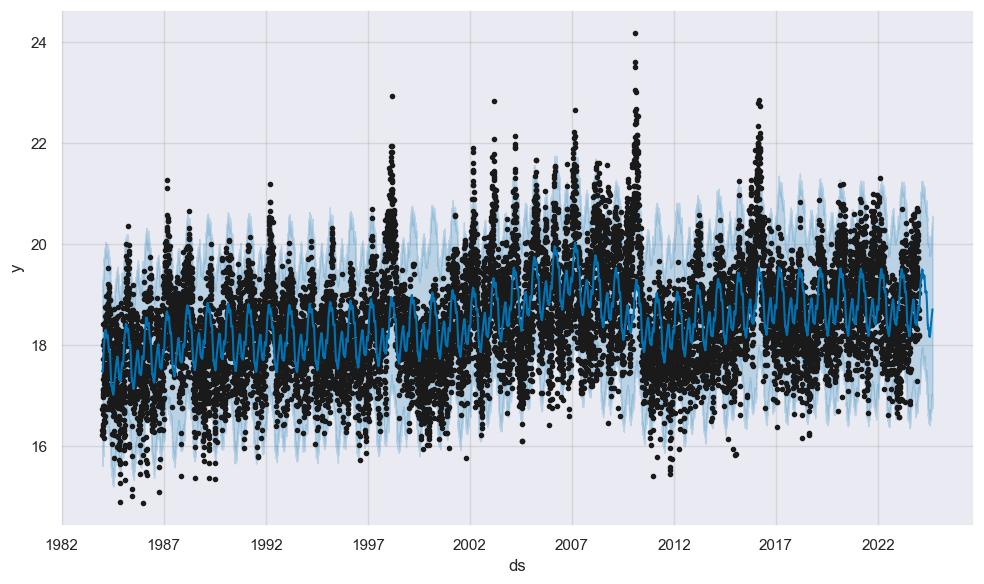

In [20]:
# Visualizar el pronostico
fig = m.plot(forecast)
ax = fig.gca()
#ax.plot( df_test["ds"], df_test["y"], 'g.')

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

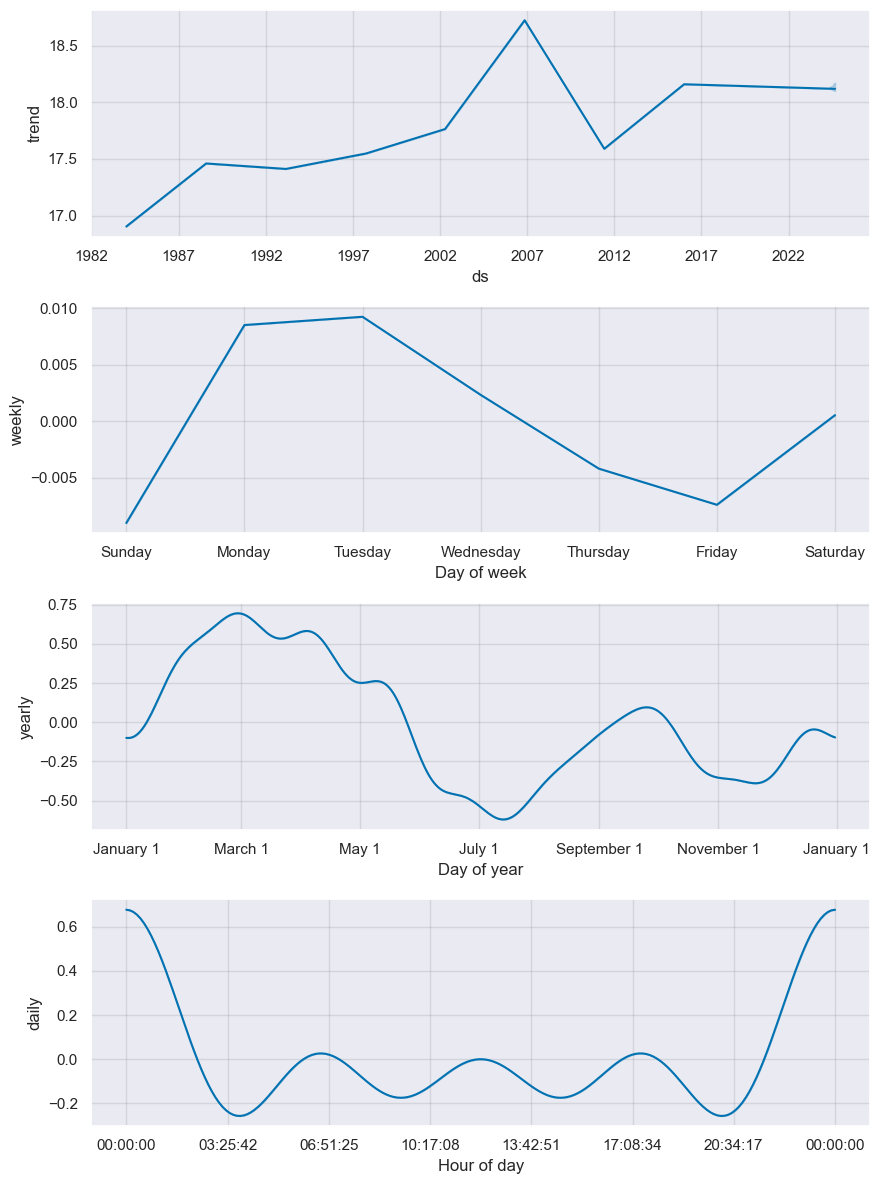

In [21]:
# Visualizar las componentes
m.plot_components(forecast);

In [22]:
# Puntos de cambio predeterminados
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')

There are 7 change points. 
The change points dates are 
                y         ds
FECHA                       
1988-07-28  18.07 1988-07-28
1993-02-21  18.95 1993-02-21
1997-09-18  18.76 1997-09-18
2002-04-14  17.42 2002-04-14
2006-11-09  19.11 2006-11-09
2011-06-05  18.05 2011-06-05
2015-12-31  21.26 2015-12-31


c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



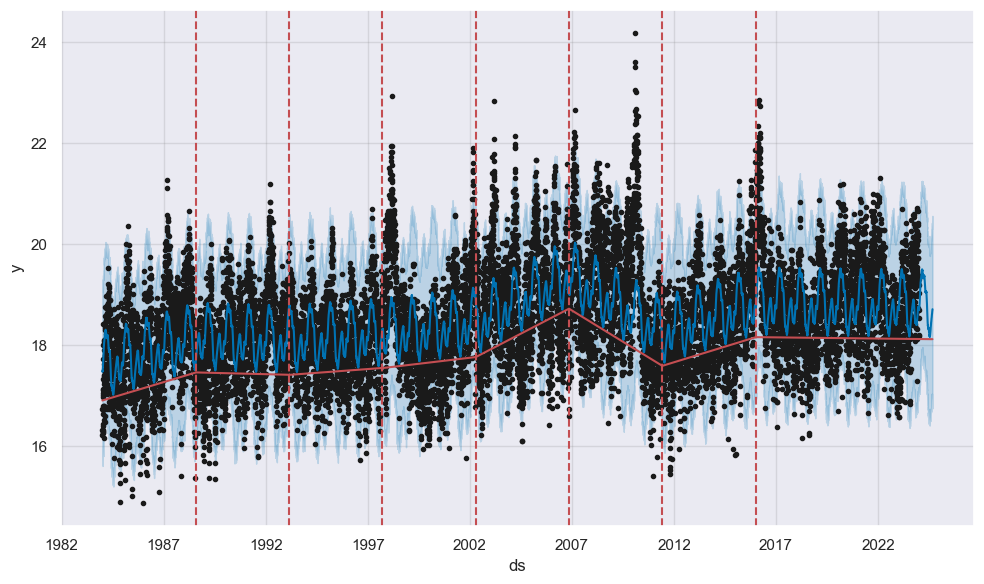

In [23]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [24]:
# Cross validation
df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1985-06-24,17.599661,16.276725,18.921123,19.19,1985-06-23
1,1985-06-25,17.694608,16.458384,19.065443,18.36,1985-06-23
2,1985-06-26,17.700400,16.476654,19.002215,18.69,1985-06-23
3,1985-06-27,17.792238,16.526479,19.026202,18.23,1985-06-23
4,1985-06-28,17.830542,16.591589,19.168822,17.12,1985-06-23


In [25]:
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,0.802262,0.895691,0.706821,0.037999,0.031249,0.037957,0.904965
1,4 days,0.823934,0.907708,0.714142,0.038357,0.030880,0.038327,0.893617
2,5 days,0.838592,0.915747,0.725981,0.039057,0.032305,0.039001,0.899291
3,6 days,0.860607,0.927689,0.733114,0.039534,0.031958,0.039412,0.892199
4,7 days,0.864655,0.929868,0.728267,0.039321,0.031936,0.039179,0.895035


c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



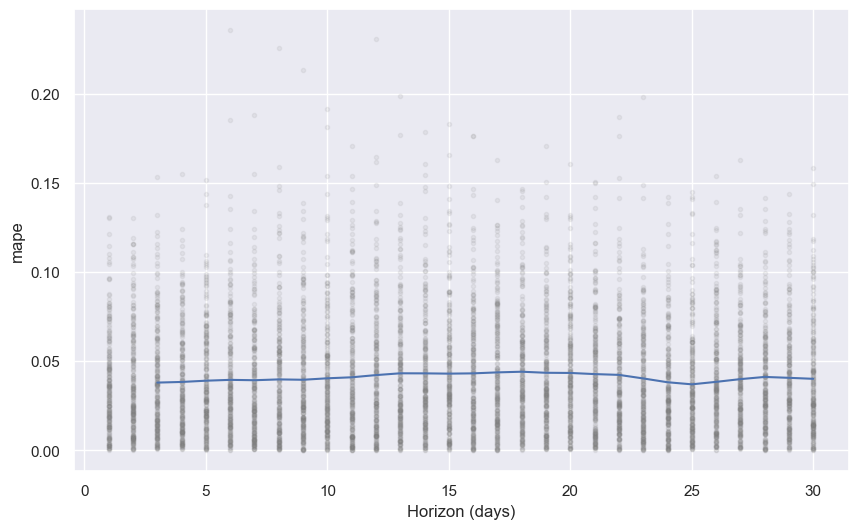

In [26]:
# Visualize the performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [29]:
# Si la columna 'FECHA' es tu índice
df.index = pd.to_datetime(df.index)
data = df["y"]  # T2M es la columna de los valores de la serie temporal


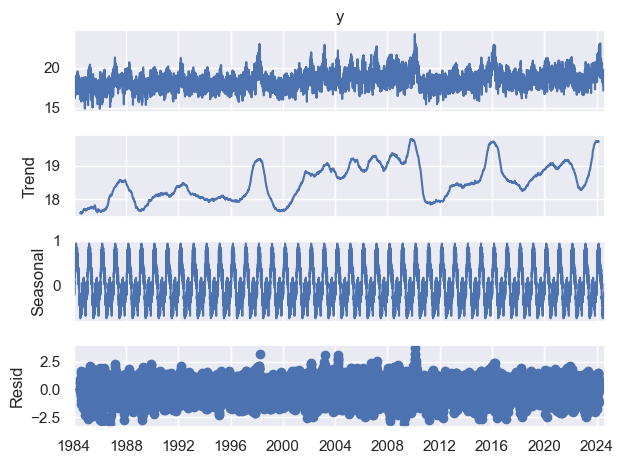

In [31]:

decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=365)  # Ajusta el período según la frecuencia de tus datos
decomposition.plot()
plt.show()

In [32]:
# Definir los parámetros SARIMA con estacionalidad anual
p, d, q = 1, 1, 1  # Parámetros no estacionales
P, D, Q, m = 1, 1, 1, 365  # Estacionalidad anual (m=365 para datos diarios)

# Ajustar el modelo SARIMA
model = sm.tsa.SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, m), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = model.fit(disp=False)

# Mostrar resumen del modelo ajustado
print(sarima_fit.summary())


c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



: 

In [ ]:
# Predicciones dentro de la muestra (ajuste)
sarima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

# Predicciones fuera de la muestra (forecast)
forecast = sarima_fit.get_forecast(steps=244)  # Pronosticar 30 días adelante
pred_conf = forecast.conf_int()  # Intervalos de confianza

# Graficar las predicciones
plt.figure(figsize=(10,6))
plt.plot(data, label='Observado')
plt.plot(forecast.predicted_mean, label='Predicción')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.show()
